<a href="https://colab.research.google.com/github/cpappas18/articulaite/blob/main/project_journal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset

We aggregated a few datasets found online into a dataset for **Parkinsons** and a dataset for **Parkinsons, ALS, and cerebral palsy**. We cleaned them and ended up with 2 versions of each : one with the NaN rows **removed**, and one where we replaced them with the **medians**. 

Let's explore the dataset we trained our final model on :

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:
df = pd.read_csv('/content/all_disorders_median_std_onehot.csv')
df = df.iloc[:, 1:]

# taking a peek
df.head()

,Control,Parkinsons,ALS,Cerebral_palsy,Gender,MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:PPQ5,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,DFA
0,0,1,0,0,0.0,0.037775,0.000503,-0.011752,0.051462,0.098145,0.313568,0.047848,0.149447,-0.102311,1.560809
1,0,1,0,0,0.0,0.069989,0.000679,-0.011752,0.100932,0.372398,1.049795,0.209514,0.380995,-0.102311,1.602059
2,0,1,0,0,0.0,0.084345,0.000855,-0.011752,0.142417,0.231999,0.519712,0.145493,0.270893,-0.102311,1.658218
3,0,1,0,0,0.0,0.075066,0.000855,-0.011752,0.120199,0.272358,0.648551,0.173852,0.295415,-0.102311,1.599274
4,0,1,0,0,0.0,0.125313,0.001207,-0.011752,0.200219,0.417743,0.895187,0.269969,0.432209,-0.102311,1.640651


In [ ]:
# 4 classes
classes = list(df.columns[:4])
classes

['Control', 'Parkinsons', 'ALS', 'Cerebral_palsy']

In [ ]:
# 11 features
features = list(df.columns[4:])
features

['Gender',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'DFA']

In [ ]:
# sample sizes
for condition in classes:
  print(condition, ":", df[condition].sum())

print("Women:", (df['Gender']==1).sum())
print("Men:", (df['Gender']==0).sum())

Control : 385
Parkinsons : 6706
ALS : 15
Cerebral_palsy : 13
Women: 2387
Men: 4732


## Comparing features by condition

[Run in Colab](https://colab.research.google.com/github/cpappas18/articulaite/blob/main/project_journal.ipynb) to view interactive boxplots.

In [ ]:
# splitting the dataset by health status
control = df[df['Control']==1].reset_index().iloc[:, 1:]
parkinsons = df[df['Parkinsons']==1].reset_index().iloc[:, 1:]
cerebral = df[df['Cerebral_palsy']==1].reset_index().iloc[:, 1:]
als = df[df['ALS']==1].reset_index().iloc[:, 1:]

In [ ]:
@interact_manual(feature=widgets.Dropdown(description='Feature:', options=features[1:]),
                 condition=widgets.Dropdown(description='Condition:', options=classes[1:]))
def compare_plots(feature, condition):
  
  if condition=='Parkinsons':
    data = parkinsons
  elif condition=='Cerebral_palsy':
    data = cerebral
  elif condition=='ALS':
    data = als

  men = data.loc[data.Gender==1.0, feature]
  controlM = control.loc[control.Gender==1.0, feature]
  women = data.loc[data.Gender==0.0, feature]
  controlF = control.loc[control.Gender==0.0, feature]
  data = [men, women, controlM, controlF]

  box = plt.boxplot(data, showfliers=False, autorange=True, patch_artist=True,
             labels=[str(condition)+' M', 'Control M', str(condition)+' F', 'Control F'])
  colors = ['cornflowerblue', 'cornflowerblue', 'lightcoral', 'lightcoral']
  for patch, color in zip(box['boxes'], colors):
      patch.set_facecolor(color)
  plt.axvline(2.5, color = 'black')
  plt.show()

interactive(children=(Dropdown(description='Feature:', options=('MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'Jitter:…

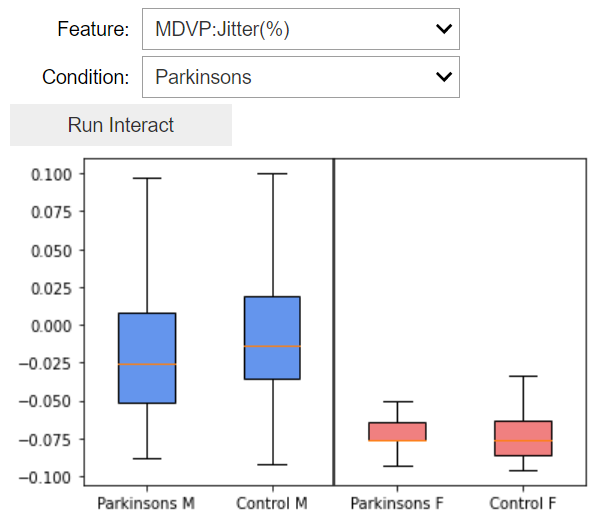

## Comparing correlation between features

Text(0.5, 1.0, "Correlation map of Parkinson's features")

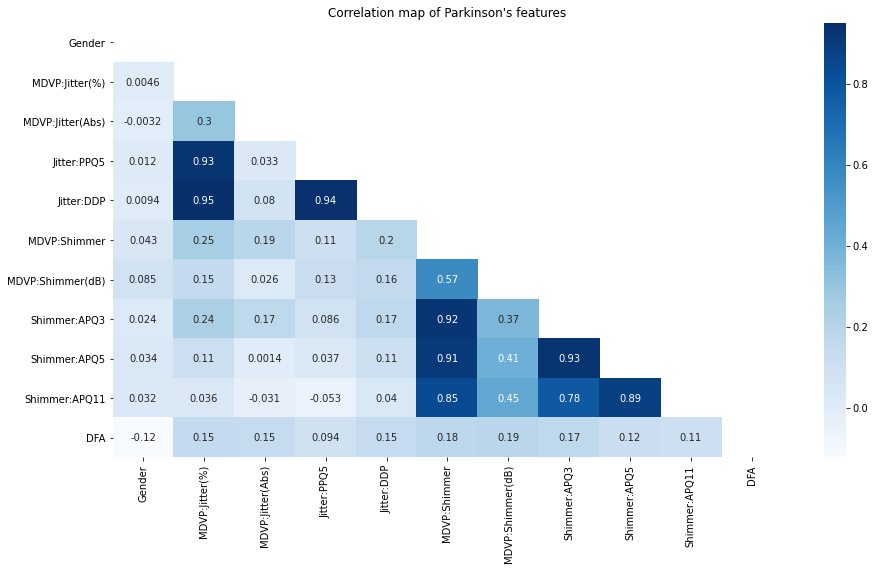

In [ ]:
# correlation heatmap
plt.figure(figsize=(15, 8))
matrix = np.triu(df[features].corr())
sns.heatmap(df[features].corr(), annot = True, cmap='Blues', mask=matrix)
plt.title('Correlation map of Parkinson\'s features')

# Picking a model

We trained several machine learning models on 8 versions of our dataset:

(PD and Healthy) | NaN rows removed | NaN replaced by median
-----------|--------------|-
dataset augmented with SMOTE | v1 | v2 
dataset not augmented | v3 | v4 

(PD, ALS, CP and Healthy) | NaN rows removed | NaN replaced by median
-----------|--------------|-
dataset augmented with SMOTE | v5 | v6 
dataset not augmented | v7 | v8 

We settled on a random forest model since it had pretty good accuracy and recall, as well as the lowest number of false negatives.

Model | Accuracy | AUC | Precision | Recall | TP | FN | F1 | KCV
-------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------
Random forest      | 96.42% | 0.9944 | 0.960 | 0.96 | 1299 | 40 | 0.96 | 0.99
Decision tree       | 98.33% |  |  |  | 1153 | 43 |  | 0.98
SVM       | 93.19% |  |  |  | 1205 | 83 |  | 0.97
Multilayer perceptron     | 93.12% |  | 0.93 | 0.93 | 1204 | 84 | 0.92 | 0.95
KNN       | 92.92% | 0.9960 | 0.840 | 0.96 | 1796 | 136 |  | 0.97

# User interface prototype

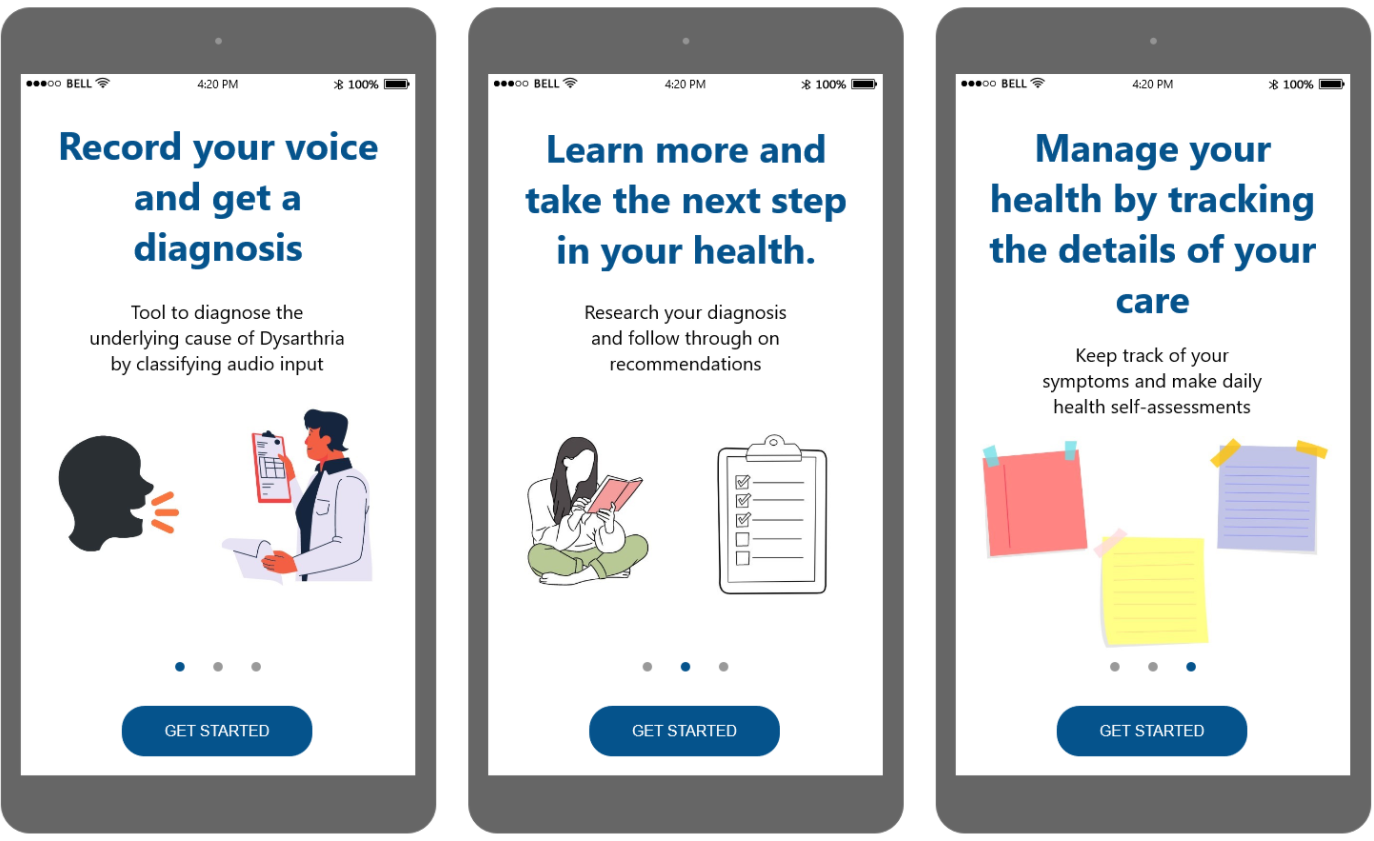

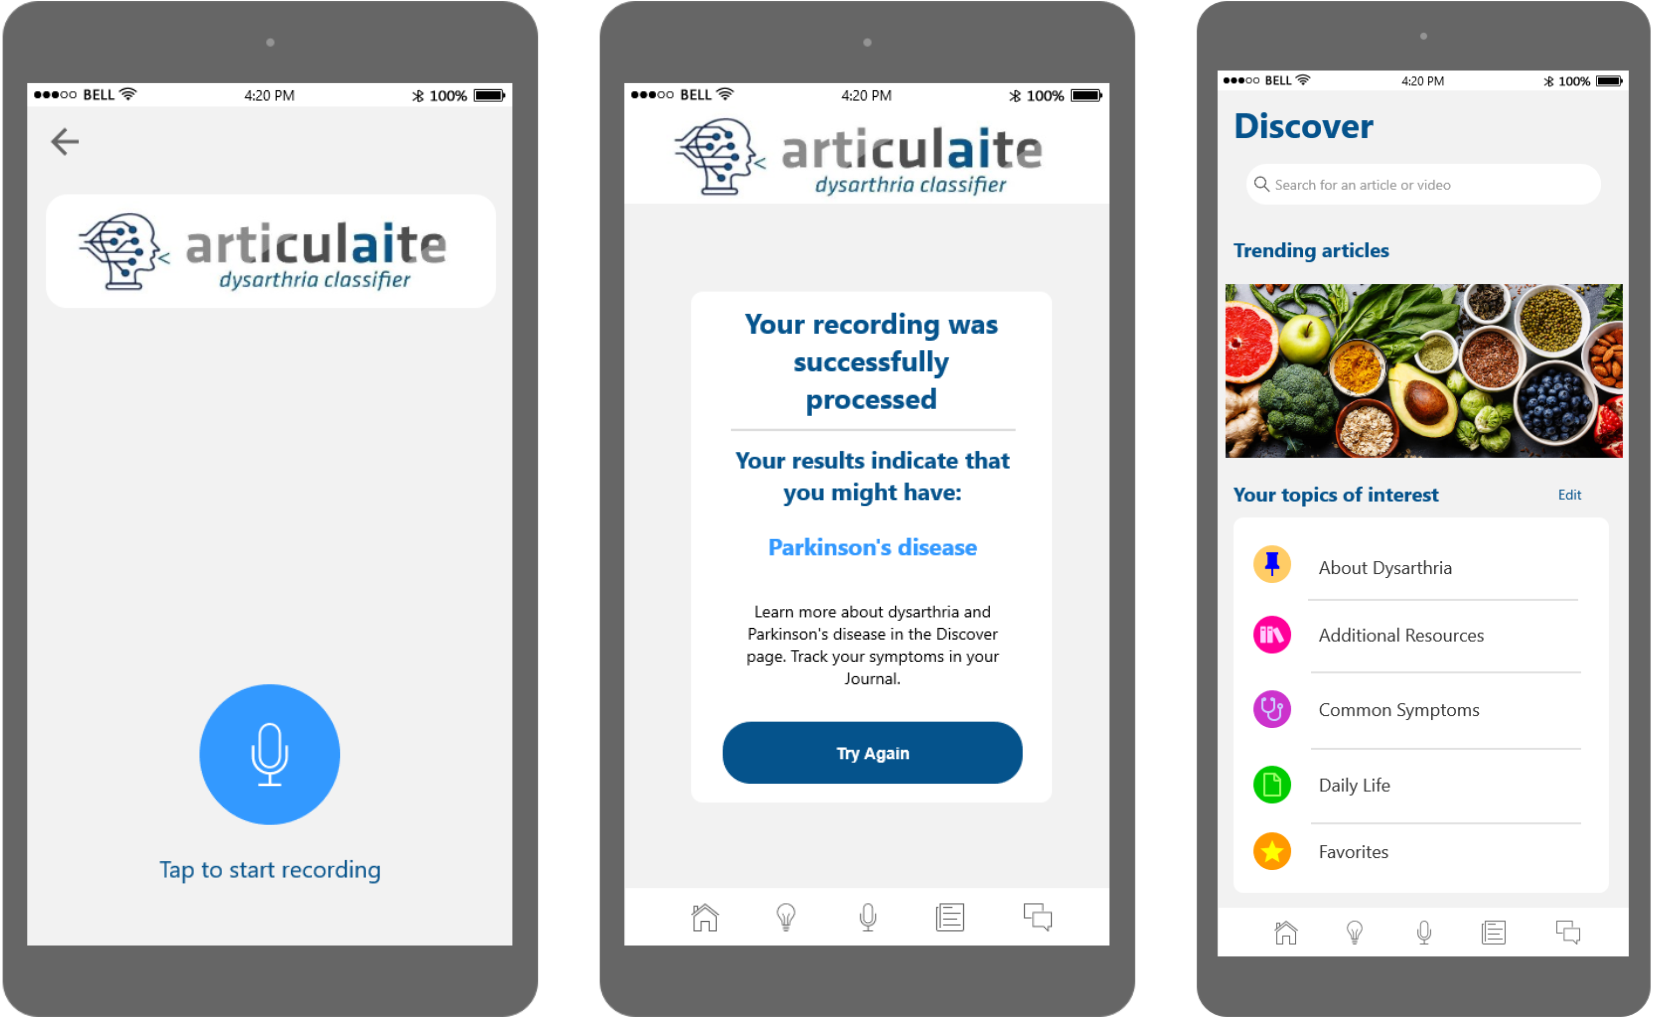

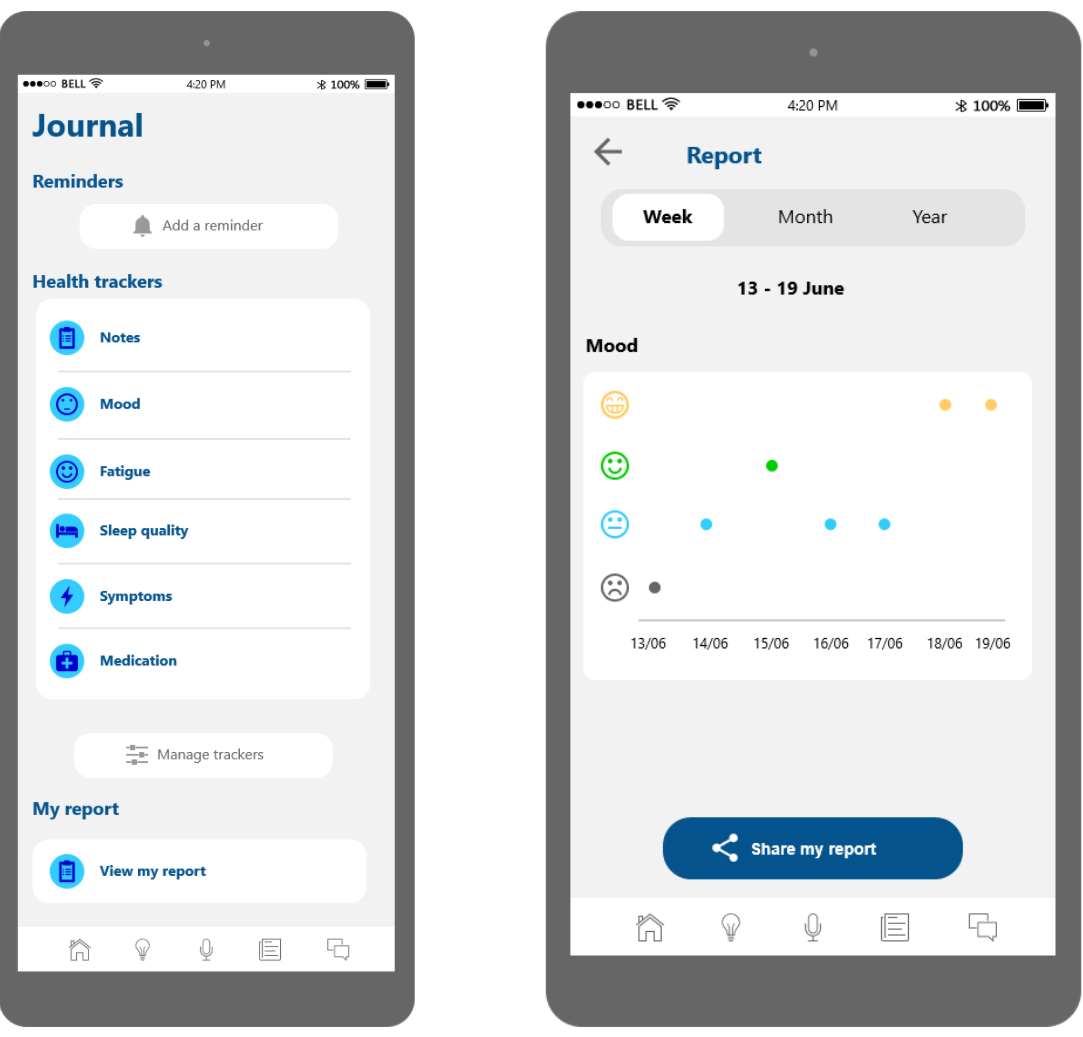